#MoodVision

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
sns.set_theme(style="ticks")

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/NUS MS BA/Projects/BT5153/BT5153 Project

import os

os.listdir('../Project Data')

train_dir = "../Project Data/train" #passing the path with training images
test_dir = "../Project Data/test"   #passing the path with testing images

/content/drive/MyDrive/NUS MS BA/Projects/BT5153/BT5153 Project


# EDA

In [4]:
train_eda = {}

for folder in os.listdir(train_dir):
    train_eda[folder] = len(os.listdir(train_dir + '/' + folder))

train_eda_df = pd.DataFrame.from_dict(train_eda, orient='index', columns=['Count'])
train_eda_df = train_eda_df.sort_values(['Count'])

test_eda = {}

for folder in os.listdir(test_dir):
    test_eda[folder] = len(os.listdir(test_dir + '/' + folder))

test_eda_df = pd.DataFrame.from_dict(test_eda, orient='index', columns=['Count'])
test_eda_df = test_eda_df.sort_values(['Count'])

In [5]:
train_eda_df

,Count
disgust,436
surprise,3171
angry,3995
fear,4097
sad,4830
neutral,4965
happy,7215


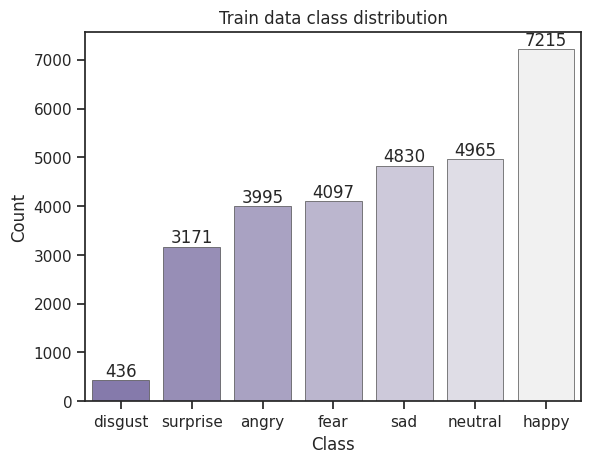

In [6]:
plt.xlabel('Class')
plt.ylabel('Count')
ax = sns.barplot(y=train_eda_df['Count'], 
            x=train_eda_df.index,
            data=train_eda_df,
            palette="light:m_r",
            edgecolor=".3",
            linewidth=.5)

abs_values = train_eda_df['Count'].values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Train data class distribution');

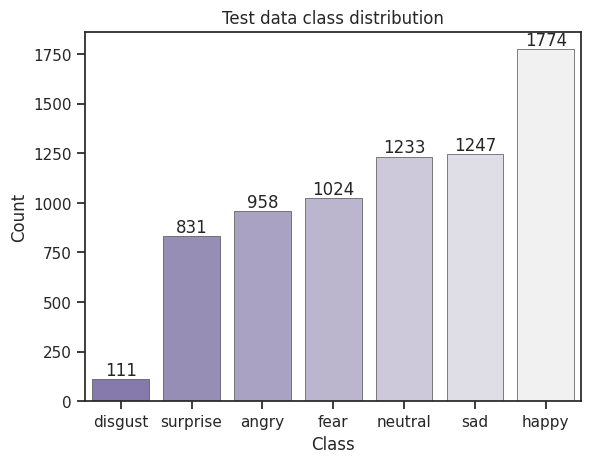

In [7]:
plt.xlabel('Class')
plt.ylabel('Count')
ax = sns.barplot(y=test_eda_df['Count'], 
            x=test_eda_df.index,
            data=test_eda_df,
            palette="light:m_r",
            edgecolor=".3",
            linewidth=.5,)

abs_values = test_eda_df['Count'].values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Test data class distribution');

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                #    validation_split = 0.2,
                                #    rotation_range=5,
                                #    width_shift_range=0.2,
                                #    height_shift_range=0.2,
                                #    shear_range=0.2,
                                #    #zoom_range=0.2,
                                #    horizontal_flip=True,
                                #    vertical_flip=True,
                                #    fill_mode='nearest'
                                )

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (48,48),
                                                    batch_size = 3,
                                                    class_mode = "categorical",
                                                    subset = "training",
                                                    shuffle=False
                                                   )

Found 28709 images belonging to 7 classes.


In [9]:
def get_key(d, val):
    for key, value in d.items():
        if value == val:
            return key

def plot_next_image(train_generator):
    # Get the next batch of images and labels from the generator
    batch = next(train_generator)
    images, labels = batch[0], batch[1]
    
    # Select the first image in the batch
    image = images[0]
    
    # Get the class label for the image
    class_index = np.argmax(labels[0])
    class_label = get_key(train_generator.class_indices, class_index)
    
    # Plot the image and display the class label as the title
    plt.imshow(image)
    plt.title(class_label)
    plt.show()


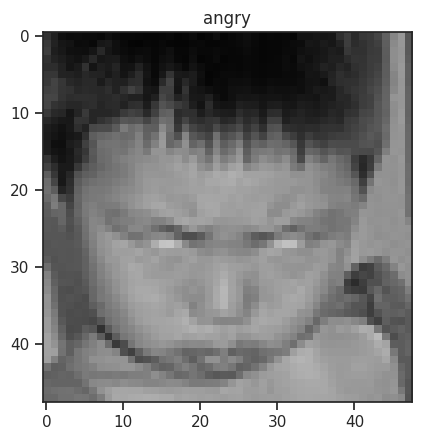

In [10]:
plot_next_image(train_generator)

# Showing samples of each class

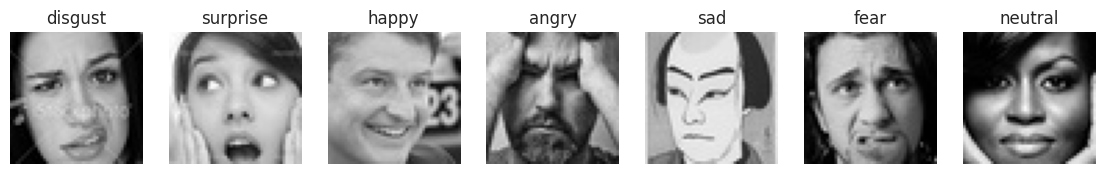

In [11]:
plt.figure(figsize=(14,22))

for i, expression in enumerate(os.listdir(train_dir)):
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[1]))
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
plt.show()

##Data Augmentation

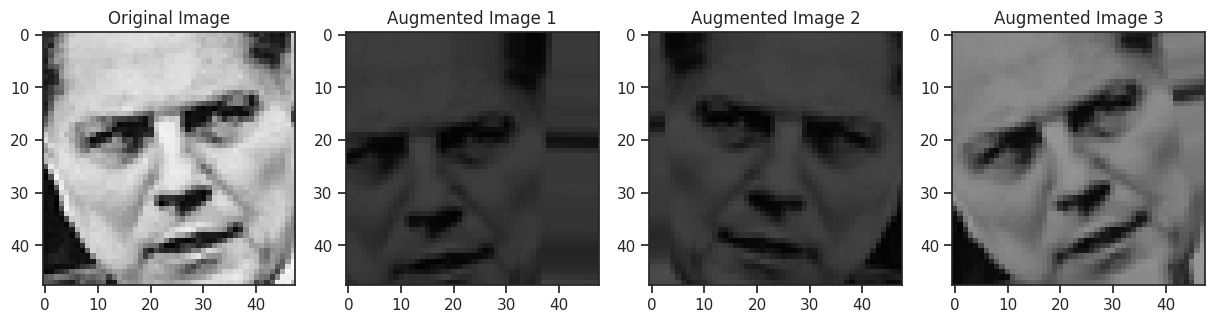

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the image using its file path
img = load_img(test_dir + "/angry/PublicTest_79773769.jpg")

# Convert the image to a numpy array
x = img_to_array(img)

# Reshape the array to match the expected input shape of the model
x = x.reshape((1,) + x.shape)

# Define the data augmentation pipeline
datagen = ImageDataGenerator(
    # rescale=1./255,
    horizontal_flip = True,
    brightness_range=(0.2,1.0),              
    shear_range=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
                                    )

# Generate augmented images from the original image
aug_iter = datagen.flow(x, batch_size=1)

# Plot the original and augmented images side by side
fig, ax = plt.subplots(1, 4, figsize=(15, 15))

# Plot the original image
ax[0].imshow(img)
ax[0].set_title('Original Image')

# Plot the augmented images
for i in range(1, 4):
    augmented_img = next(aug_iter)[0].astype('uint8')
    ax[i].imshow(augmented_img)
    ax[i].set_title('Augmented Image {}'.format(i))

plt.show()
